In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
def ageCategorization(x):
  record = int(re.sub('[a-zA-Z]','',x))
  if (record <= 21):
    result = 'below21'
  elif (record >= 21 and record <= 30):
    result = 'between21to30'
  elif (record >= 31 and record <= 40):
    result = 'between31to40'
  elif (record >= 41 and record < 50):
    result = 'between41to50'
  elif (record >= 50):
    result = '50plus'
  else:
    result = 'None'
  
  return result

In [3]:
# def GEQCategory(min5, min15, min25):
#   if (min5 == 1 & min15 == 1 & min25 == 1):
#     category = 'GEQ25min'
#   elif (min5 == 1 & min15 == 1 & min25 == 0):
#     category = 'GEQ15min'
#   elif (min5 == 1 & min15 == 0 & min25 == 0):
#     category = 'GEQ5min'
#   else:
#     category = 'None'
  
#   return category
def GEQCategory(data):
  if (data == 3):
    category = 'GEQ25min'
  elif (data == 2):
    category = 'GEQ15min'
  else:
    category = 'GEQ5min'

  return category

***Creating GEQ_Category Column for analysis and re-Categorizing age Attribute for cleaner buckets.***

In [4]:
couponData = pd.read_csv('/content/drive/MyDrive/TSW_IIT_HACKATHON_#1/train.csv')
couponData['age_category'] = couponData['age'].apply(ageCategorization)
GEQ_Sum = couponData['toCoupon_GEQ5min'] + couponData['toCoupon_GEQ15min'] + couponData['toCoupon_GEQ25min']
couponData['GEQ_Cat_Sum'] = GEQ_Sum
couponData['GEQ_Category'] = couponData['GEQ_Cat_Sum'].apply(GEQCategory)
couponData.head()

,customer_id,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,age_category,GEQ_Cat_Sum,GEQ_Category
0,258868,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),1d,Male,21,Unmarried partner,0,Some college - no degree,Student,Less than $12500,NaN,less1,1~3,4~8,4~8,never,1,1,0,0,1,1,below21,2,GEQ15min
1,318369,Work,Alone,Sunny,80,7AM,Restaurant(<20),2h,Male,21,Single,0,Bachelors degree,Student,$37500 - $49999,NaN,less1,1~3,4~8,1~3,less1,1,0,0,1,0,0,below21,1,GEQ5min
2,320906,No Urgent Place,Alone,Sunny,80,10AM,Coffee House,2h,Female,21,Married partner,0,Some college - no degree,Student,Less than $12500,NaN,less1,gt8,4~8,1~3,1~3,1,1,0,0,1,0,below21,2,GEQ15min
3,412393,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Female,26,Single,0,Bachelors degree,Computer & Mathematical,$25000 - $37499,NaN,less1,less1,4~8,1~3,never,1,1,1,0,1,0,between21to30,3,GEQ25min
4,290854,Home,Alone,Snowy,30,6PM,Coffee House,1d,Male,31,Single,0,Some college - no degree,Unemployed,$12500 - $24999,NaN,1~3,less1,4~8,less1,never,1,1,0,0,1,0,between31to40,2,GEQ15min


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***Analyzing Basic Attribute information like datatypes columns having null values. Total no of records in the data etc.***

In [6]:
couponData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10147 entries, 0 to 10146
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           10147 non-null  int64 
 1   destination           10147 non-null  object
 2   passanger             10147 non-null  object
 3   weather               10147 non-null  object
 4   temperature           10147 non-null  int64 
 5   time                  10147 non-null  object
 6   coupon                10147 non-null  object
 7   expiration            10147 non-null  object
 8   gender                10147 non-null  object
 9   age                   10147 non-null  object
 10  maritalStatus         10147 non-null  object
 11  has_children          10147 non-null  int64 
 12  education             10147 non-null  object
 13  occupation            10147 non-null  object
 14  income                10147 non-null  object
 15  car                   84 non-null   

***Analysis Cell:***

Based on output obtained from the info function below are basic inferences from data.

1> Maximum no of attributes do not have null values. columns like Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50 have null values.
2> car attribute as 0.8% non-null thus it does not make sense pursuing this column for model as even null value handling will not yield any significance in this attributes influence on final outcome.

***Describing the Numerical Attributes to get various statistical analysis of each attribute***

In [7]:
couponData.describe(include='all')

,customer_id,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,age_category,GEQ_Cat_Sum,GEQ_Category
count,10147.000000,10147,10147,10147,10147.000000,10147,10147,10147,10147,10147,10147,10147.000000,10147,10147,10147,84,10059,9975,10025,10050,9999,10147.0,10147.000000,10147.000000,10147.000000,10147.000000,10147.000000,10147,10147.000000,10147
unique,NaN,3,4,3,NaN,5,5,2,2,8,5,NaN,6,25,9,5,5,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,3
top,NaN,No Urgent Place,Alone,Sunny,NaN,6PM,Coffee House,1d,Female,21,Married partner,NaN,Bachelors degree,Unemployed,$25000 - $37499,crossover,never,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN,NaN,NaN,between31to40,NaN,GEQ15min
freq,NaN,5045,5802,8015,NaN,2576,3191,5643,5204,2133,4086,NaN,3511,1485,1622,18,4150,2696,3741,4296,4889,NaN,NaN,NaN,NaN,NaN,NaN,2701,NaN,4497
mean,311272.276831,NaN,NaN,NaN,63.172366,NaN,NaN,NaN,NaN,NaN,NaN,0.412634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.563024,0.119838,0.212181,0.787819,0.568444,NaN,1.682862,NaN
std,106781.701016,NaN,NaN,NaN,19.232595,NaN,NaN,NaN,NaN,NaN,NaN,0.492332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.496037,0.324788,0.408872,0.408872,0.495318,NaN,0.675487,NaN
min,123472.000000,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN
25%,221439.000000,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,1.000000,NaN
50%,310062.000000,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000,NaN,2.000000,NaN
75%,401537.000000,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000,NaN,2.000000,NaN


***Analysis Cell:***

Based on output obtained from the info function below are basic inferences from data.

1> summary function from pandas gives stats only for numeric attributes by default. Majority of our input attributes are categorical thus we use the include='all' option of describe function so it includes all types of columns and not just numerical.
2> categorical columns have basic information as total non null values, total unique values and and top category with most no of records all other statistical observations not applicable to categorical columns are Nan.

                 destination_cnt  total_count    percent
destination                                             
Home                        2572        10147  25.347393
No Urgent Place             5045        10147  49.719129
Work                        2530        10147  24.933478


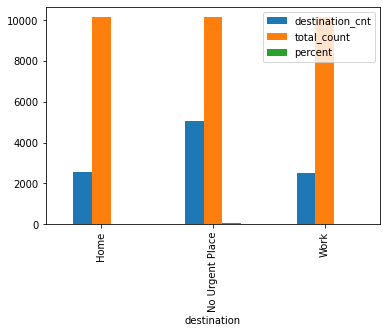

In [8]:
dest_data = couponData.groupby('destination').agg(destination_cnt=('destination',np.count_nonzero))
dest_data['total_count'] = len(couponData.index)
dest_data['percent'] = dest_data['destination_cnt']/dest_data['total_count']*100
# dest_data.loc['Total']= dest_data.sum()
print(dest_data)
dest_data.plot(kind='bar')

***Analysis Cell:***

Based on output obtained from the frequency distribution of destination column below are the inferences.

1> Around 50% distribution is of No Urgency.
2> The attribute gives location where user is to head after using the coupon. aboves stats do not make much impact and thus this attribute will like be removed from final set of attributes.

           passenger_cnt  total_count    percent
passanger                                       
Alone               5802        10147  57.179462
Friend(s)           2676        10147  26.372327
Kid(s)               814        10147   8.022075
Partner              855        10147   8.426136


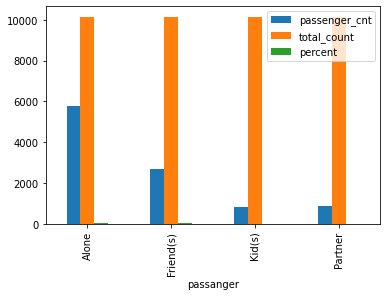

In [9]:
passngr_data = couponData.groupby('passanger').agg(passenger_cnt=('passanger',np.count_nonzero))
passngr_data['total_count'] = len(couponData.index)
passngr_data['percent'] = passngr_data['passenger_cnt']/passngr_data['total_count']*100
# dest_data.loc['Total']= dest_data.sum()
print(passngr_data)
passngr_data.plot(kind='bar')

***Analysis Cell:***

Based on output obtained from the frequency distribution of passanger column below are the inferences.

1> Around 57% distribution is of Alone.
2> It seems more likely that if the person is alone he/she is more likely to use the coupon.

                     weather_cnt  total_count    percent
weather temperature                                     
Rainy   55                   990        10147   9.756578
Snowy   30                  1142        10147  11.254558
Sunny   30                   744        10147   7.332216
        55                  2068        10147  20.380408
        80                  5203        10147  51.276239


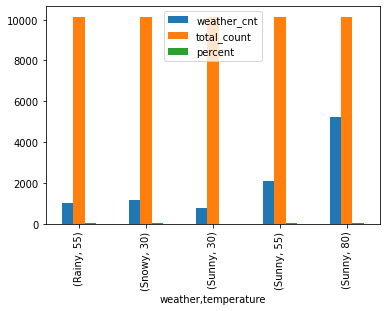

In [10]:
wthr_data = couponData.groupby(['weather','temperature']).agg(weather_cnt=('weather',np.count_nonzero))
wthr_data['total_count'] = len(couponData.index)
wthr_data['percent'] = wthr_data['weather_cnt']/wthr_data['total_count']*100
# dest_data.loc['Total']= dest_data.sum()
print(wthr_data)
wthr_data.plot(kind='bar')

***Analysis Cell:***

Based on output obtained from the frequency distribution of weather and temperature column below are the inferences.

1> Around 51% distribution is of Sunny 80 temp.
2> It seems more likely that if the peopleare more likely to use the coupon on sunnay days during the day time when the temperatures are on warmer side.
3> also overall in sunny weather irrespective of time of day and temperature their is 78% chance of the coupon being used.

      time_cnt  total_count    percent
time                                  
10AM      1833        10147  18.064453
10PM      1592        10147  15.689366
2PM       1616        10147  15.925889
6PM       2576        10147  25.386814
7AM       2530        10147  24.933478


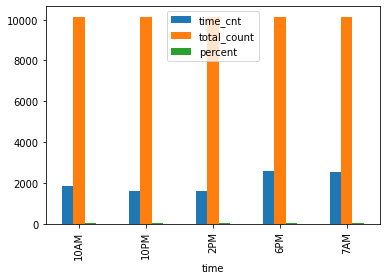

In [11]:
time_data = couponData.groupby('time').agg(time_cnt=('time',np.count_nonzero))
time_data['total_count'] = len(couponData.index)
time_data['percent'] = time_data['time_cnt']/time_data['total_count']*100
# dest_data.loc['Total']= dest_data.sum()
print(time_data)
time_data.plot(kind='bar')

***Analysis Cell:***

Based on output obtained from the frequency distribution of time column below are the inferences.

1> ditribution in this column is quite even.
2> significance of this column is still aquestion.

                       coupon_cnt  total_count    percent
coupon                                                   
Bar                          1623        10147  15.994875
Carry out & Take away        1923        10147  18.951414
Coffee House                 3191        10147  31.447719
Restaurant(20-50)            1177        10147  11.599488
Restaurant(<20)              2233        10147  22.006504


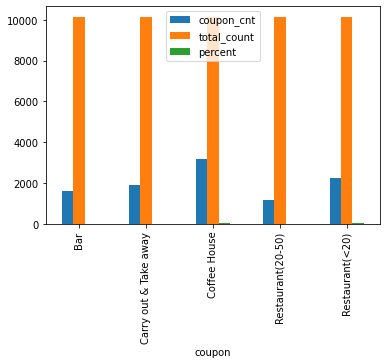

In [12]:
coupon_data = couponData.groupby('coupon').agg(coupon_cnt=('coupon',np.count_nonzero))
coupon_data['total_count'] = len(couponData.index)
coupon_data['percent'] = coupon_data['coupon_cnt']/coupon_data['total_count']*100
# dest_data.loc['Total']= dest_data.sum()
print(coupon_data)
coupon_data.plot(kind='bar')

***Analysis Cell:***

Based on output obtained from the frequency distribution of coupon column below are the inferences.

1> ditribution in this column can be seen to be quite well distributed but still it can observed that coupons solde a coffee shos are more likely to be used.

        gender_cnt  total_count    percent
gender                                    
Female        5204        10147  51.286094
Male          4943        10147  48.713906


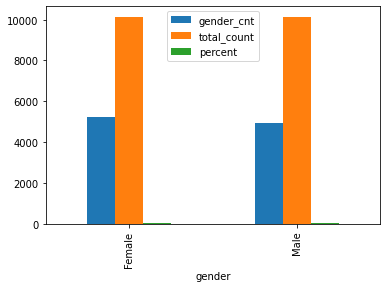

In [13]:
gender_data = couponData.groupby('gender').agg(gender_cnt=('gender',np.count_nonzero))
gender_data['total_count'] = len(couponData.index)
gender_data['percent'] = gender_data['gender_cnt']/gender_data['total_count']*100
# dest_data.loc['Total']= dest_data.sum()
print(gender_data)
gender_data.plot(kind='bar')

***Analysis Cell:***

Based on output obtained from the frequency distribution of gender column below are the inferences.

1> ditribution in this column very evenly distributes thus we can say that gender alone does not make a significant impact on the target variable.

               age_cnt  total_count    percent
age_category                                  
50plus            1431        10147  14.102690
below21           2565        10147  25.278407
between21to30     2033        10147  20.035478
between31to40     2701        10147  26.618705
between41to50     1417        10147  13.964719


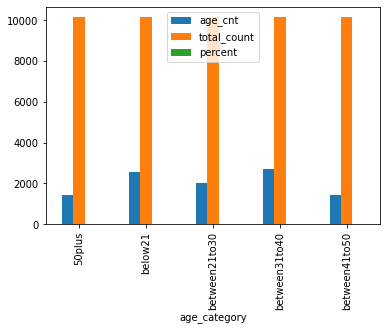

In [14]:
age_data = couponData.groupby('age_category').agg(age_cnt=('age_category',np.count_nonzero))
age_data['total_count'] = len(couponData.index)
age_data['percent'] = age_data['age_cnt']/age_data['total_count']*100
# dest_data.loc['Total']= dest_data.sum()
print(age_data)
age_data.plot(kind='bar')

***Analysis Cell:***

Based on output obtained from the frequency distribution of age column below are the inferences.

1> based onabove age buckets it seems data is quite evenly distributes. below21 and 50plus bucts are natuaral while others were derived. if we consider 21 to 50 as on single bucket the distribution is around 60% of people within 21 to 50 years of age are most likely to use the coupons.

                   status_cnt  total_count    percent
maritalStatus                                        
Divorced                  417        10147   4.109589
Married partner          4086        10147  40.268060
Single                   3806        10147  37.508623
Unmarried partner        1737        10147  17.118360
Widowed                   101        10147   0.995368


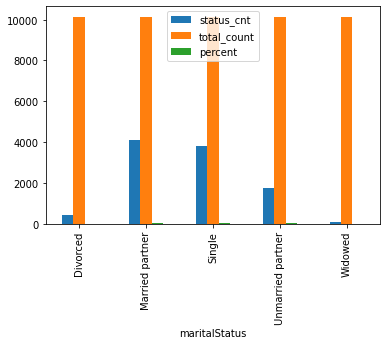

In [15]:
status_data = couponData.groupby('maritalStatus').agg(status_cnt=('maritalStatus',np.count_nonzero))
status_data['total_count'] = len(couponData.index)
status_data['percent'] = status_data['status_cnt']/status_data['total_count']*100
# dest_data.loc['Total']= dest_data.sum()
print(status_data)
status_data.plot(kind='bar')

***Analysis Cell:***

Based on output obtained from the frequency distribution of maratialStatus column below are the inferences.

1> based on above summary it seems that the maratial status had a variation which suggests that might have a role in the outcome for target variable.
2> it seems 2 of the categories status is Married Partner and Single are more likely to use coupon along with unmarried partner.

              children_cnt  total_count    percent
has_children                                      
0                        0        10147   0.000000
1                     4187        10147  41.263428


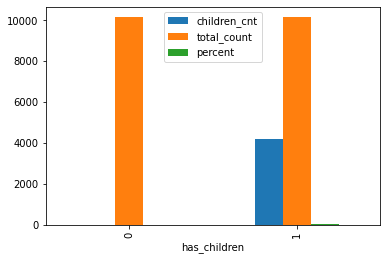

In [16]:
children_data = couponData.groupby('has_children').agg(children_cnt=('has_children',np.count_nonzero))
children_data['total_count'] = len(couponData.index)
children_data['percent'] = children_data['children_cnt']/children_data['total_count']*100
# dest_data.loc['Total']= dest_data.sum()
print(children_data)
children_data.plot(kind='bar')

***Analysis Cell:***

Based on output obtained from the frequency distribution of has_children column below are the inferences.

1> calculations are wrong due to count_nonzero but still it is pretty clear that child or no child the ditribution is quite even and this attribute may not have significant impact on final outcome.

                                        edu_cnt  total_count    percent
education                                                              
Associates degree                           924        10147   9.106140
Bachelors degree                           3511        10147  34.601360
Graduate degree (Masters or Doctorate)     1477        10147  14.556026
High School Graduate                        708        10147   6.977432
Some High School                             68        10147   0.670149
Some college - no degree                   3459        10147  34.088893


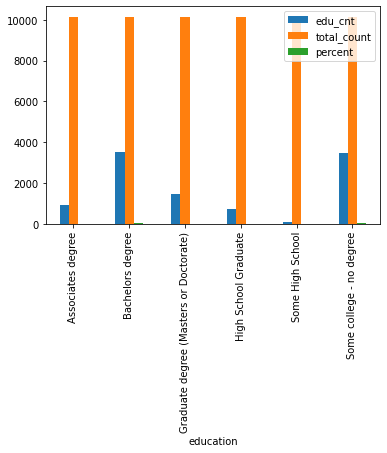

In [17]:
edu_data = couponData.groupby('education').agg(edu_cnt=('education',np.count_nonzero))
edu_data['total_count'] = len(couponData.index)
edu_data['percent'] = edu_data['edu_cnt']/edu_data['total_count']*100
# dest_data.loc['Total']= dest_data.sum()
print(edu_data)
edu_data.plot(kind='bar')

***Analysis Cell:***

Based on output obtained from the frequency distribution of education column below are the inferences.

1> calculations in this attribute given an indication that people with higher education degree or pursuing higher education are most likely to use the coupons.

                                           occup_cnt  total_count    percent
occupation                                                                  
Architecture & Engineering                       139        10147   1.369863
Arts Design Entertainment Sports & Media         526        10147   5.183798
Building & Grounds Cleaning & Maintenance         37        10147   0.364640
Business & Financial                             433        10147   4.267271
Community & Social Services                      198        10147   1.951316
Computer & Mathematical                         1111        10147  10.949049
Construction & Extraction                        118        10147   1.162905
Education&Training&Library                       753        10147   7.420913
Farming Fishing & Forestry                        36        10147   0.354785
Food Preparation & Serving Related               241        10147   2.375086
Healthcare Practitioners & Technical             205        10147   2.020302

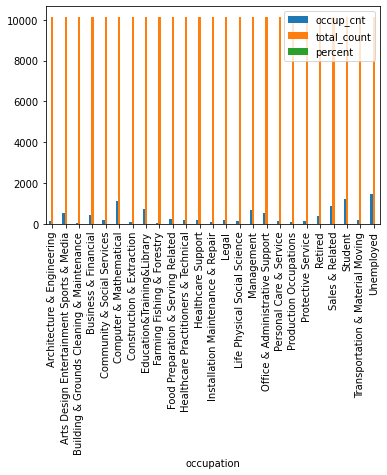

In [18]:
occup_data = couponData.groupby('occupation').agg(occup_cnt=('occupation',np.count_nonzero))
occup_data['total_count'] = len(couponData.index)
occup_data['percent'] = occup_data['occup_cnt']/occup_data['total_count']*100
# dest_data.loc['Total']= dest_data.sum()
print(occup_data)
occup_data.plot(kind='bar')

***Analysis Cell:***

Based on output obtained from the frequency distribution of occupation column below are the inferences.

1> calculations in this attribute are quite evenly distributed on lower side which give little to no sense on its impact on target or its significance.
2> we can consolidate this categorical column further in to even higher level categories or on basis of distribution and use both set of consolidate heirarchial columns to analyse the distribution further.

                  income_cnt  total_count    percent
income                                              
$100000 or More         1408        10147  13.876022
$12500 - $24999         1464        10147  14.427910
$25000 - $37499         1622        10147  15.985020
$37500 - $49999         1444        10147  14.230807
$50000 - $62499         1318        10147  12.989061
$62500 - $74999          664        10147   6.543806
$75000 - $87499          695        10147   6.849315
$87500 - $99999          712        10147   7.016852
Less than $12500         820        10147   8.081206


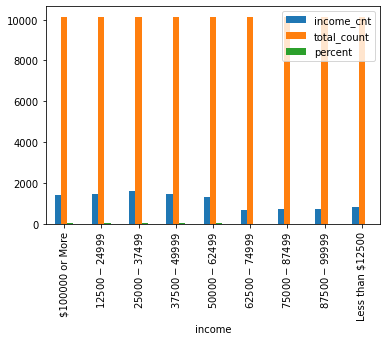

In [19]:
income_data = couponData.groupby('income').agg(income_cnt=('income',np.count_nonzero))
income_data['total_count'] = len(couponData.index)
income_data['percent'] = income_data['income_cnt']/income_data['total_count']*100
# dest_data.loc['Total']= dest_data.sum()
print(income_data)
income_data.plot(kind='bar')

***Analysis Cell:***

Based on output obtained from the frequency distribution of income column below are the inferences.

1> calculations in this attribute are quite evenly distributed on lower side which give little to no sense on its impact on target or its significance.

       bar_cnt  total_count    percent
Bar                                   
1~3       1979        10147  19.503301
4~8        859        10147   8.465556
gt8        290        10147   2.857988
less1     2781        10147  27.407115
never     4150        10147  40.898788


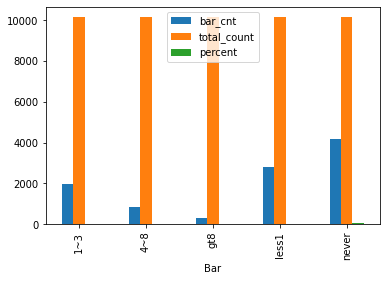

In [20]:
bar_data = couponData.groupby('Bar').agg(bar_cnt=('Bar',np.count_nonzero))
bar_data['total_count'] = len(couponData.index)
bar_data['percent'] = bar_data['bar_cnt']/bar_data['total_count']*100
# dest_data.loc['Total']= dest_data.sum()
print(bar_data)
bar_data.plot(kind='bar')

***Analysis Cell:***

Based on output obtained from the frequency distribution of bar column below are the inferences.

1> calculations in this attribute indicate that people who have never visited the bar are more likely to use the coupon.

             coffeHouse_cnt  total_count    percent
CoffeeHouse                                        
1~3                    2586        10147  25.485365
4~8                    1423        10147  14.023849
gt8                     895        10147   8.820341
less1                  2696        10147  26.569429
never                  2375        10147  23.405933


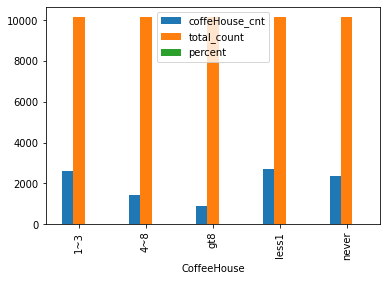

In [21]:
coffeHouse_data = couponData.groupby('CoffeeHouse').agg(coffeHouse_cnt=('CoffeeHouse',np.count_nonzero))
coffeHouse_data['total_count'] = len(couponData.index)
coffeHouse_data['percent'] = coffeHouse_data['coffeHouse_cnt']/coffeHouse_data['total_count']*100
# dest_data.loc['Total']= dest_data.sum()
print(coffeHouse_data)
coffeHouse_data.plot(kind='bar')

***Analysis Cell:***

Based on output obtained from the frequency distribution of coffe_house column below are the inferences.

1> calculations in this attribute indicate that people who have never visited the coffe_house have used the coupons 50% of the times. while ones visting less that 3 time further add 25% to the usage.

           carryAway_cnt  total_count    percent
CarryAway                                       
1~3                 3741        10147  36.868040
4~8                 3416        10147  33.665123
gt8                 1263        10147  12.447029
less1               1485        10147  14.634867
never                120        10147   1.182616


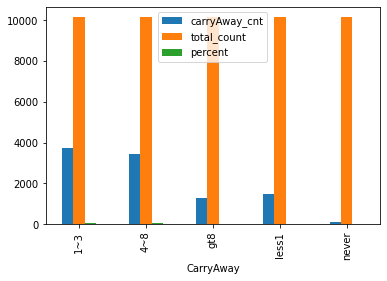

In [22]:
carryAway_data = couponData.groupby('CarryAway').agg(carryAway_cnt=('CarryAway',np.count_nonzero))
carryAway_data['total_count'] = len(couponData.index)
carryAway_data['percent'] = carryAway_data['carryAway_cnt']/carryAway_data['total_count']*100
# dest_data.loc['Total']= dest_data.sum()
print(carryAway_data)
carryAway_data.plot(kind='bar')

***Analysis Cell:***

Based on output obtained from the frequency distribution of carryAway column below are the inferences.

1> calculations in this attribute indicate that people who have often visted carry away or take aways tend to use the coupons very often around 80% plus.

                      restLT20_cnt  total_count    percent
RestaurantLessThan20                                      
1~3                           4296        10147  42.337637
4~8                           2868        10147  28.264512
gt8                           1025        10147  10.101508
less1                         1688        10147  16.635459
never                          173        10147   1.704937


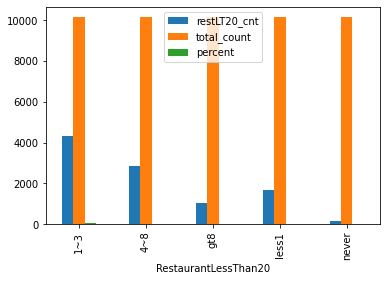

In [23]:
restLT20_data = couponData.groupby('RestaurantLessThan20').agg(restLT20_cnt=('RestaurantLessThan20',np.count_nonzero))
restLT20_data['total_count'] = len(couponData.index)
restLT20_data['percent'] = restLT20_data['restLT20_cnt']/restLT20_data['total_count']*100
# dest_data.loc['Total']= dest_data.sum()
print(restLT20_data)
restLT20_data.plot(kind='bar')

***Analysis Cell:***

Based on output obtained from the frequency distribution of restaurent less than 20 column below are the inferences.

1> calculations in this attribute indicate that people who have often visted restaurent wheer less than 20 anout coupons are distributed tend to use the coupons very often around 80% plus.

                  rest20to50_cnt  total_count    percent
Restaurant20To50                                        
1~3                         2622        10147  25.840150
4~8                          579        10147   5.706120
gt8                          216        10147   2.128708
less1                       4889        10147  48.181729
never                       1693        10147  16.684734


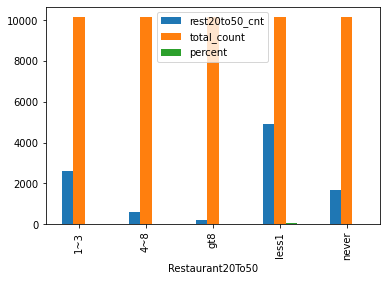

In [24]:
rest20to50_data = couponData.groupby('Restaurant20To50').agg(rest20to50_cnt=('Restaurant20To50',np.count_nonzero))
rest20to50_data['total_count'] = len(couponData.index)
rest20to50_data['percent'] = rest20to50_data['rest20to50_cnt']/rest20to50_data['total_count']*100
# dest_data.loc['Total']= dest_data.sum()
print(rest20to50_data)
rest20to50_data.plot(kind='bar')

***Analysis Cell:***

Based on output obtained from the frequency distribution of restaurent 20 to 50 column below are the inferences.

1> calculations in this attribute indicate that people who have often visted restaurent where 20 to 50 amout coupons are distributed tend not to use the coupons very often around 60% plus.

              GEQ_cnt  total_count    percent
GEQ_Category                                 
GEQ15min         4497        10147  44.318518
GEQ25min         1216        10147  11.983838
GEQ5min          4434        10147  43.697645


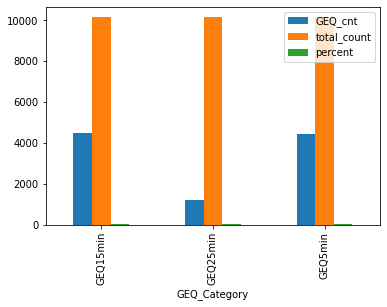

In [25]:
GEQ_data = couponData.groupby('GEQ_Category').agg(GEQ_cnt=('GEQ_Category',np.count_nonzero))
GEQ_data['total_count'] = len(couponData.index)
GEQ_data['percent'] = GEQ_data['GEQ_cnt']/GEQ_data['total_count']*100
# dest_data.loc['Total']= dest_data.sum()
print(GEQ_data)
GEQ_data.plot(kind='bar')

***Analysis Cell:***

Based on output obtained from the frequency distribution of GEQ Category column below are the inferences.

1> calculations in this attribute indicate that people tend to use the coupons very often around 90% plus times if the distance to mall is less than 15 mins of drive.
2> also this column should be checked in association with direction column to have a better understanding of results or impact on target.

`

                                           GEQdirec_cnt  total_count    percent
GEQ_Category direction_same direction_opp                                      
GEQ15min     0              1                      3903        10147  38.464571
             1              0                       594        10147   5.853947
GEQ25min     0              1                      1216        10147  11.983838
GEQ5min      0              1                      2875        10147  28.333498
             1              0                      1559        10147  15.364147


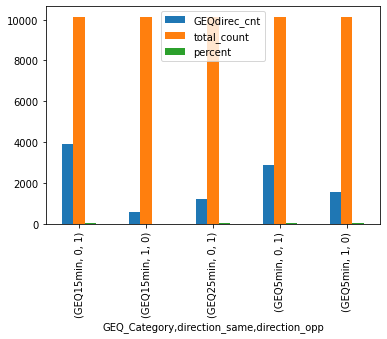

In [26]:
GEQdirec_data = couponData.groupby(['GEQ_Category','direction_same','direction_opp']).agg(GEQdirec_cnt=('GEQ_Category',np.count_nonzero))
GEQdirec_data['total_count'] = len(couponData.index)
GEQdirec_data['percent'] = GEQdirec_data['GEQdirec_cnt']/GEQdirec_data['total_count']*100
# dest_data.loc['Total']= dest_data.sum()
print(GEQdirec_data)
GEQdirec_data.plot(kind='bar')

***Analysis Cell:***

Based on output obtained from the frequency distribution of GEQ Category and direction column below are the inferences.

1> calculations in this attribute indicate that people tend to use the coupons very often around 90% plus times if the distance to mall is less than 15 mins of drive and it does not matter if it is in same or opposite direction.

***Analysing of important features using the chi squared test***

In [27]:
# example of chi squared feature selection for categorical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.feature_selection import chi2
from matplotlib import pyplot

# changed data selction columns
# couponData_og = couponData[['destination','passanger','weather','temperature','time','coupon','expiration','gender','age_category','maritalStatus','has_children','education','occupation','income','Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50','toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min','direction_same','direction_opp','Y']]
couponData_og = couponData[['education','RestaurantLessThan20','CarryAway','temperature', 'age_category', 'income', 'CoffeeHouse','occupation','time','coupon','Bar','direction_same','expiration','passanger','Restaurant20To50','GEQ_Category','Y']]
couponData_final = couponData[['destination','passanger','weather','temperature','time','coupon','expiration','gender','age_category','maritalStatus','has_children','education','occupation','income','Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50','GEQ_Category','direction_same','direction_opp','Y']]

***Analysing features on original dataset. method to get X and y Split***

In [28]:
# load the dataset
def load_dataset(data):
	# load the dataset as a pandas DataFrame
	# data = read_csv(filename, header=None)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, :-1]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	return X, y

In [29]:
# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

In [30]:
# feature selection
def select_features_chi(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

def select_features_mutual(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 26.282146
Feature 1: 0.297748
Feature 2: 17.772863
Feature 3: 9.534253
Feature 4: 0.168131
Feature 5: 20.100514
Feature 6: 243.558844
Feature 7: 0.410822
Feature 8: 21.580605
Feature 9: 46.082527
Feature 10: 62.269416
Feature 11: 0.764126
Feature 12: 68.350502
Feature 13: 30.682678
Feature 14: 23.122772
Feature 15: 11.340383


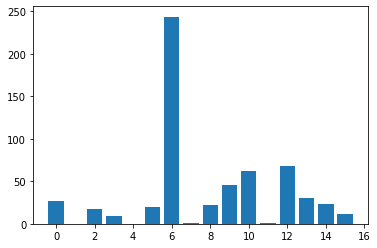

In [31]:
# load the dataset
X, y = load_dataset(couponData_og)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features_chi(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

***Analysis Cell:***

Based on set of outcomes from chi square test to identify best set of features.

considering minimum 20% as threshold below features seem to be important features.

feature_name-->feature_no-->feature_score
1> passanger-->Feature 1-->30.682678
2> time-->Feature 4-->21.580605
3> coupon-->Feature 5-->46.082527
4> expiration-->Feature 6-->68.350502
5> education-->Feature 11-->26.282146
6> income-->Feature 13-->20.100514
7> Bar-->Feature 14-->62.269416
8> CoffeeHouse-->Feature 15-->243.558844
9> Restaurant20To50-->Feature 18-->23.122772
10> toCoupon_GEQ25min-->Feature 21-->58.631971

***Analysing of important features using the mutual info classification test***

Feature 0: 0.001584
Feature 1: 0.006486
Feature 2: 0.003402
Feature 3: 0.009767
Feature 4: 0.007479
Feature 5: 0.002487
Feature 6: 0.013209
Feature 7: 0.001320
Feature 8: 0.001299
Feature 9: 0.022441
Feature 10: 0.000000
Feature 11: 0.000000
Feature 12: 0.014453
Feature 13: 0.004306
Feature 14: 0.006600
Feature 15: 0.003987


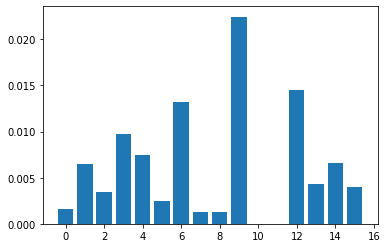

In [32]:
# load the dataset
X, y = load_dataset(couponData_og)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features_mutual(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

***Analysis Cell:***

Based on set of outcomes from chi square test to identify best set of features.

considering minimum 20% as threshold below features seem to be important features.

feature_name-->feature_no-->feature_score
1> passanger-->Feature 1-->0.007508
2> time-->Feature 4-->0.016845
3> coupon-->Feature 5-->0.034983
4> occupation-->Feature 12-->0.008199
5> income-->Feature 13-->0.017166
6> Bar-->Feature 14-->0.012343
7> CoffeeHouse-->Feature 15-->0.013105
8> CarryAway-->Feature 16-->0.009283
9> RestaurantLessThan20-->Feature 17-->0.005441
10> Restaurant20To50-->Feature 18-->0.007385
11> direction_same-->Feature 22-->0.006377

***Implementing Random Forest algorithm on original dataset to get first cut.***

In [33]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier, RandomForestRegressor

In [34]:
customer_id_train = couponData['customer_id']
couponData_ogrf = couponData[['destination','passanger','weather','temperature','time','coupon','expiration','gender','age_category','maritalStatus','has_children','education','occupation','income','Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50','toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min','direction_same','direction_opp','Y']]
couponData_ogrf['Bar'] = couponData_ogrf['Bar'].fillna("never")
couponData_ogrf['CoffeeHouse'] = couponData_ogrf['CoffeeHouse'].fillna("less1")
couponData_ogrf['CarryAway'] = couponData_ogrf['CarryAway'].fillna("4~8")
couponData_ogrf['RestaurantLessThan20'] = couponData_ogrf['RestaurantLessThan20'].fillna("1~3")
couponData_ogrf['Restaurant20To50'] = couponData_ogrf['Restaurant20To50'].fillna("less1")
# couponData_ogrf['occupation'].replace(to_replace =["Food Preparation & Serving Related","Healthcare Practitioners & Technical","Community & Social Services","Healthcare Support","Legal", "Transportation & Material Moving","Life Physical Social Science", "Architecture & Engineering","Personal Care & Service", "Protective Service","Construction & Extraction","Installation Maintenance & Repair","Production Occupations", "Building & Grounds Cleaning & Maintenance", "Farming Fishing & Forestry"],value = "Others",inplace=True)

le = LabelEncoder()

couponData_ogrf['destination'] = le.fit_transform(couponData_ogrf['destination'])
couponData_ogrf['passanger'] = le.fit_transform(couponData_ogrf['passanger'])
couponData_ogrf['weather'] = le.fit_transform(couponData_ogrf['weather'])
couponData_ogrf['time'] = le.fit_transform(couponData_ogrf['time'])
couponData_ogrf['coupon'] = le.fit_transform(couponData_ogrf['coupon'])
couponData_ogrf['expiration'] = le.fit_transform(couponData_ogrf['expiration'])
couponData_ogrf['gender'] = le.fit_transform(couponData_ogrf['gender'])
couponData_ogrf['age_category'] = le.fit_transform(couponData_ogrf['age_category'])
couponData_ogrf['maritalStatus'] = le.fit_transform(couponData_ogrf['maritalStatus'])
couponData_ogrf['education'] = le.fit_transform(couponData_ogrf['education'])
couponData_ogrf['occupation'] = le.fit_transform(couponData_ogrf['occupation'])
couponData_ogrf['income'] = le.fit_transform(couponData_ogrf['income'])
couponData_ogrf['Bar'] = le.fit_transform(couponData_ogrf['Bar'])
couponData_ogrf['CoffeeHouse'] = le.fit_transform(couponData_ogrf['CoffeeHouse'])
couponData_ogrf['CarryAway'] = le.fit_transform(couponData_ogrf['CarryAway'])
couponData_ogrf['RestaurantLessThan20'] = le.fit_transform(couponData_ogrf['RestaurantLessThan20'])
couponData_ogrf['Restaurant20To50'] = le.fit_transform(couponData_ogrf['Restaurant20To50'])
couponData_ogrf.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age_category,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,1,1,2,80,3,4,0,1,1,3,0,5,22,8,3,0,1,1,4,1,1,0,0,1,1
1,2,0,2,80,4,4,1,1,1,2,0,1,22,3,3,0,1,0,3,1,0,0,1,0,0
2,1,0,2,80,0,2,1,0,1,1,0,5,22,8,3,2,1,0,0,1,1,0,0,1,0
3,2,0,0,55,4,4,1,0,2,2,0,1,5,2,3,3,1,0,4,1,1,1,0,1,0
4,0,0,1,30,3,2,0,1,3,2,0,5,24,1,0,3,1,3,4,1,1,0,0,1,0


In [35]:
# # Labels are the values we want to predict
# y = np.array(couponData_ogrf['Y'])

# # Remove the labels from the features
# # axis 1 refers to the columns
# X= couponData_ogrf.drop('Y', axis = 1)

# # Saving feature names for later use
# feature_list = list(couponData_ogrf.columns)
# # Convert to numpy array
# X = np.array(X)

X = couponData_ogrf.drop(['Y'], axis=1).copy()
y = couponData_ogrf.Y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)
clf = RandomForestClassifier(max_samples=0.9,n_estimators=1000,max_features=16)
clf.fit(X_train, y_train)

# Make predictions for the test set
y_pred_test = clf.predict(X_test)

clf.score(X_test, y_test)

0.7540402049664958

In [36]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

array([[ 723,  372],
       [ 252, 1190]])

In [37]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.74      0.66      0.70      1095
           1       0.76      0.83      0.79      1442

    accuracy                           0.75      2537
   macro avg       0.75      0.74      0.75      2537
weighted avg       0.75      0.75      0.75      2537



In [38]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_dt = clf.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.6819077650768625

In [39]:
clf = RandomForestClassifier(max_samples=0.9,n_estimators=1000,max_features=16)
clf.fit(X_train, y_train)
y_pred_rf = clf.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.7520693732755223

In [40]:
clf = AdaBoostClassifier(n_estimators=50)
clf.fit(X_train, y_train)
y_pred_ada = clf.predict(X_test)
accuracy_score(y_test, y_pred_ada)

0.6862435947970044

In [41]:
clf = GradientBoostingClassifier(n_estimators=50)
clf.fit(X_train, y_train)
y_pred_gdb = clf.predict(X_test)
accuracy_score(y_test, y_pred_gdb)

0.7162002364998029

In [42]:
data = pd.read_csv('/content/drive/MyDrive/TSW_IIT_HACKATHON_#1/test.csv')
customer_id_test = data['customer_id']
data['age_category'] = data['age'].apply(ageCategorization)
GEQ_Sum = data['toCoupon_GEQ5min'] + data['toCoupon_GEQ15min'] + data['toCoupon_GEQ25min']
data['GEQ_Cat_Sum'] = GEQ_Sum
data['GEQ_Category'] = data['GEQ_Cat_Sum'].apply(GEQCategory)

couponData_ogrf_test = data[['destination','passanger','weather','temperature','time','coupon','expiration','gender','age_category','maritalStatus','has_children','education','occupation','income','Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50','toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min','direction_same','direction_opp']]
couponData_ogrf_test['Bar'] = couponData_ogrf_test['Bar'].fillna("never")
couponData_ogrf_test['CoffeeHouse'] = couponData_ogrf_test['CoffeeHouse'].fillna("less1")
couponData_ogrf_test['CarryAway'] = couponData_ogrf_test['CarryAway'].fillna("4~8")
couponData_ogrf_test['RestaurantLessThan20'] = couponData_ogrf_test['RestaurantLessThan20'].fillna("1~3")
couponData_ogrf_test['Restaurant20To50'] = couponData_ogrf_test['Restaurant20To50'].fillna("less1")
# couponData_ogrf_test['occupation'].replace(to_replace =["Food Preparation & Serving Related","Healthcare Practitioners & Technical","Community & Social Services","Healthcare Support","Legal", "Transportation & Material Moving","Life Physical Social Science", "Architecture & Engineering","Personal Care & Service", "Protective Service","Construction & Extraction","Installation Maintenance & Repair","Production Occupations", "Building & Grounds Cleaning & Maintenance", "Farming Fishing & Forestry"],value = "Others",inplace=True)

le = LabelEncoder()

couponData_ogrf_test['destination'] = le.fit_transform(couponData_ogrf_test['destination'])
couponData_ogrf_test['passanger'] = le.fit_transform(couponData_ogrf_test['passanger'])
couponData_ogrf_test['weather'] = le.fit_transform(couponData_ogrf_test['weather'])
couponData_ogrf_test['time'] = le.fit_transform(couponData_ogrf_test['time'])
couponData_ogrf_test['coupon'] = le.fit_transform(couponData_ogrf_test['coupon'])
couponData_ogrf_test['expiration'] = le.fit_transform(couponData_ogrf_test['expiration'])
couponData_ogrf_test['gender'] = le.fit_transform(couponData_ogrf_test['gender'])
couponData_ogrf_test['age_category'] = le.fit_transform(couponData_ogrf_test['age_category'])
couponData_ogrf_test['maritalStatus'] = le.fit_transform(couponData_ogrf_test['maritalStatus'])
couponData_ogrf_test['education'] = le.fit_transform(couponData_ogrf_test['education'])
couponData_ogrf_test['occupation'] = le.fit_transform(couponData_ogrf_test['occupation'])
couponData_ogrf_test['income'] = le.fit_transform(couponData_ogrf_test['income'])
couponData_ogrf_test['Bar'] = le.fit_transform(couponData_ogrf_test['Bar'])
couponData_ogrf_test['CoffeeHouse'] = le.fit_transform(couponData_ogrf_test['CoffeeHouse'])
couponData_ogrf_test['CarryAway'] = le.fit_transform(couponData_ogrf_test['CarryAway'])
couponData_ogrf_test['RestaurantLessThan20'] = le.fit_transform(couponData_ogrf_test['RestaurantLessThan20'])
couponData_ogrf_test['Restaurant20To50'] = le.fit_transform(couponData_ogrf_test['Restaurant20To50'])
couponData_ogrf_test.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age_category,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,1,1,2,80,3,2,0,0,1,2,0,5,11,8,4,0,3,1,3,1,0,0,0,1
1,0,0,2,80,3,1,1,1,1,3,0,3,9,1,0,4,2,1,0,1,1,0,1,0
2,1,0,0,55,0,2,0,0,2,1,1,5,24,2,4,4,0,3,4,1,1,0,0,1
3,1,3,2,80,3,0,0,1,0,3,1,0,20,4,4,1,1,0,3,1,1,0,0,1
4,2,0,2,30,4,1,0,0,2,1,0,5,16,6,4,4,0,1,3,1,1,0,0,1


In [43]:
clf = RandomForestClassifier()
clf.fit(X, y)

# Make predictions for the test set
y_pred_test = clf.predict(couponData_ogrf_test)

finalDF = pd.DataFrame({'customer_id':customer_id_test, 'Y':y_pred_test})
finalDF.to_csv('team9_ml_junkies_rf1.csv')

In [ ]:
# compare standalone models for binary classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
from sklearn.ensemble import BaggingClassifier
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return X, y

# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	# level0.append(('ada_boost', AdaBoostClassifier()))
	level0.append(('rf_boost_entropy', RandomForestClassifier(criterion='entropy')))
	level0.append(('rf_boost', RandomForestClassifier(max_samples=0.9,n_estimators=1000,max_features=16))) 
	# level0.append(('rfreg_boost', RandomForestRegressor())) 
	level0.append(('gd_boost', GradientBoostingClassifier()))
	level0.append(('bagging', BaggingClassifier()))
	# level0.append(('svm', SVC()))
	# level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)  
	return model

# get a list of models to evaluate
def get_models():
	models = dict()
	# models['cart'] = DecisionTreeClassifier()
	# models['ada_boost'] = AdaBoostClassifier()
	# models['rf_boost'] = RandomForestClassifier()
	# models['gd_boost'] = GradientBoostingClassifier() 
	# models['bagging'] = BaggingClassifier()  
	models['stacking'] = get_stacking()  
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
# X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
from sklearn.ensemble import StackingRegressor
# define dataset
# X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
# define the base models
level0 = list()
level0.append(('rf_boost_entropy', RandomForestClassifier(criterion='entropy')))
level0.append(('rf_boost', RandomForestClassifier(max_samples=0.9,n_estimators=1000,max_features=16)))
level0.append(('gd_boost', GradientBoostingClassifier()))
level0.append(('bagging', BaggingClassifier()))
# define meta learner model
level1 = LogisticRegression()
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(X, y)
# make a prediction for one example

yhat = model.predict(couponData_ogrf_test)
print(yhat)

finalDF = pd.DataFrame({'customer_id':customer_id_test, 'Y':yhat})
finalDF.to_csv('team9_ml_junkies_rf_stack_2rf_op3.csv')